Importing Necessary Libraries

In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Extracting data using two data sources

In [8]:
data = pd.read_csv("datasets/application_record.csv",encoding = 'utf-8')
record = pd.read_csv("datasets/credit_record.csv", encoding = 'utf-8')


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [11]:
data['ID'].nunique() # the total rows are 438,557. This means it has duplicates

438510

In [12]:
record['ID'].nunique() 
# this has around 45,985 unique rows as there are repeating entries for different monthly values and status.

45985

In [13]:
len(set(record['ID']).intersection(set(data['ID']))) # checking to see how many records match in two datasets

36457

<AxesSubplot: >

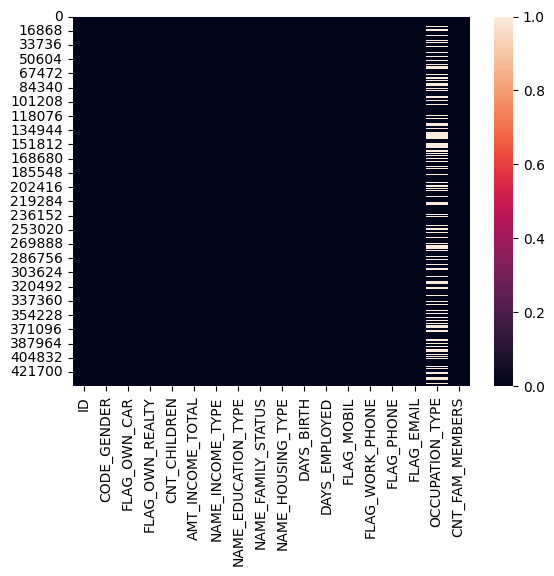

In [14]:
sns.heatmap(data.isnull()) # checking for null values. The occupation_type has many missing values

<AxesSubplot: >

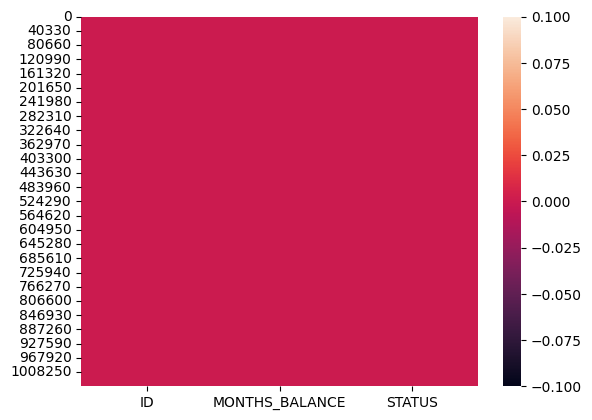

In [15]:
sns.heatmap(record.isnull()) # checking for null values. 

In [16]:
#Top record of the data
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [17]:
data = data.drop_duplicates('ID', keep='last') 
# we identified that there are some duplicates in this dataset
# we will be deleting those duplicates and will keep the last entry of the ID if its repeated.

In [18]:
data.drop('OCCUPATION_TYPE', axis=1, inplace=True) 
#we identified earlier that occupation_type has many missing values
# we will drop this column

In [19]:
ot = pd.DataFrame(data.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type
#we are filtering the columns that have non numeric values to see if they are useful

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [20]:
num_type = pd.DataFrame(data.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']
#HAVE CREATED SEPARATE LIST FOR NUMERIC TYPE INCASE IT WILL BE NEEDED IN FURTHER ANALYSIS
# IT IS NEEDED IN FURTHER ANALYSIS

In [21]:
pip install -U scikit-learn

     ---------------------------------------- 8.3/8.3 MB 3.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Boon\\anaconda3\\envs\\py310\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes=='object':
        data[x] = le.fit_transform(data[x])
# we have transformed all the non numeric data columns into data columns
# this method applies 0,1.. classification to different value types.

In [23]:
#Top record of the record
data.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0


In [24]:
data[num_type].head()
# We will look at numeric columns and see if there is anything that needs to be changed. 

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0


<AxesSubplot: xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

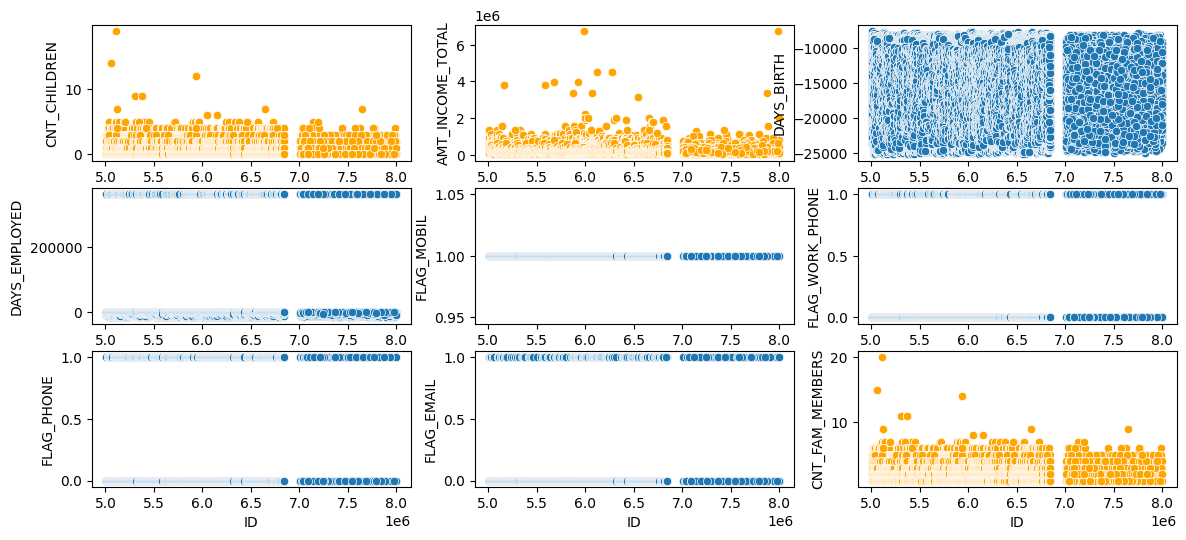

In [25]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=data, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=data, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=data, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=data, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=data, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=data, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=data, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=data, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=data, ax=ax[2][2], color= 'orange')

There are outliers in 3 columns.

CNT_CHILDREN
AMT_INCOME_TOTAL
CNT_FAM_MEMBERS
We need to remove these outliers to make sure they do not affect our model results.
We will now remove these outliers.

In [26]:
# FOR CNT_CHILDREN COLUMN
q_hi = data['CNT_CHILDREN'].quantile(0.999)
q_low = data['CNT_CHILDREN'].quantile(0.001)
data = data[(data['CNT_CHILDREN']>q_low) & (data['CNT_CHILDREN']<q_hi)]

In [27]:
# FOR AMT_INCOME_TOTAL COLUMN
q_hi = data['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = data['AMT_INCOME_TOTAL'].quantile(0.001)
data= data[(data['AMT_INCOME_TOTAL']>q_low) & (data['AMT_INCOME_TOTAL']<q_hi)]

In [28]:
#FOR CNT_FAM_MEMBERS COLUMN
q_hi = data['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = data['CNT_FAM_MEMBERS'].quantile(0.001)
app= data[(data['CNT_FAM_MEMBERS']>q_low) & (data['CNT_FAM_MEMBERS']<q_hi)]

<AxesSubplot: xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

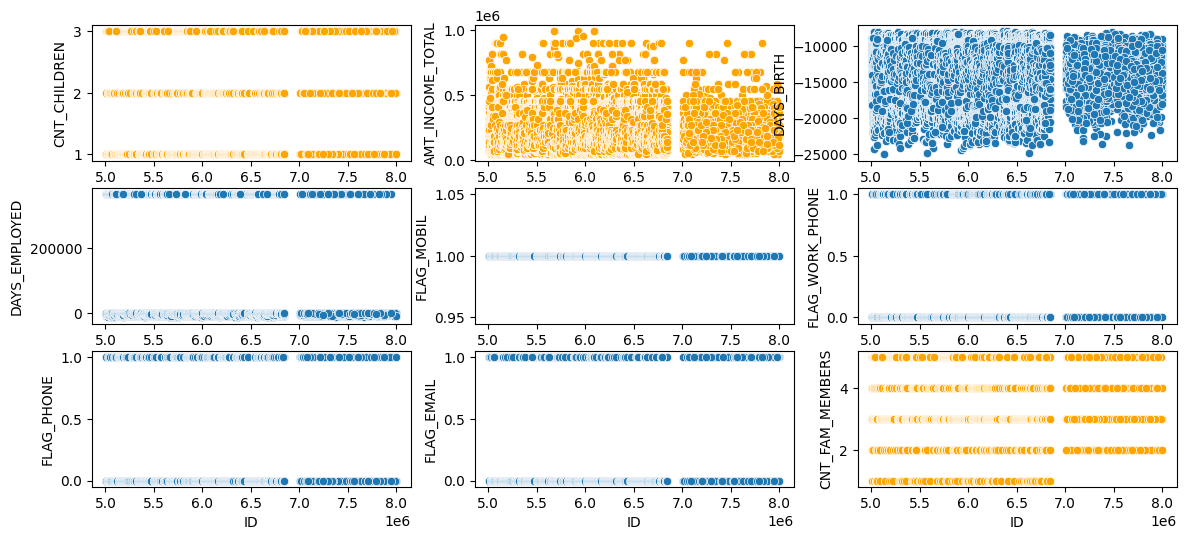

In [29]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=data, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=data, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=data, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=data, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=data, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=data, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=data, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=data, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=data, ax=ax[2][2], color= 'orange')

In [30]:
record['Months from today'] = record['MONTHS_BALANCE']*-1
record = record.sort_values(['ID','Months from today'], ascending=True)
record.head(10)
# we calculated months from today column to see how much old is the month
# we also sort the data according to ID and Months from today columns. 

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


In [31]:
record['STATUS'].value_counts() 
# performed a value count on status to see how many values exist of each type

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [32]:
record['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
record['STATUS'] = record['STATUS'].astype('int')
record['STATUS'] = record['STATUS'].apply(lambda x:1 if x >= 2 else 0)
# replace the value C and X with 0 as it is the same type
# 1,2,3,4,5 are classified as 1 because they are the same type
# these will be our labels/prediction results for our model

In [33]:
record['STATUS'].value_counts(normalize=True) 
# there is a problem here
# the data is oversampled for the labels
# 0 are 99%
# 1 are only 1% in the whole dataset
# we will need to address the oversampling issue in order to make sense of our analysis
# this will be done after when we combine both the datasets
# so first we will join the datasets

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

In [34]:
recordgb = record.groupby('ID').agg(max).reset_index()
recordgb.head() 
#we are grouping the data in record by ID so that we can join it with app

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


In [35]:
df = data.join(recordgb.set_index('ID'), on='ID', how='inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()
# no that this is joined, we will solve over sampling issue

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
24,5008834,0,0,1,1,112500.0,4,4,3,1,-10968,-1620,1,0,0,0,2.0,0
25,5008835,0,0,1,1,112500.0,4,4,3,1,-10968,-1620,1,0,0,0,2.0,0
27,5008836,1,1,1,3,270000.0,4,4,1,1,-12689,-1163,1,0,0,0,5.0,0
28,5008837,1,1,1,3,270000.0,4,4,1,1,-12689,-1163,1,0,0,0,5.0,0
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0


<AxesSubplot: >

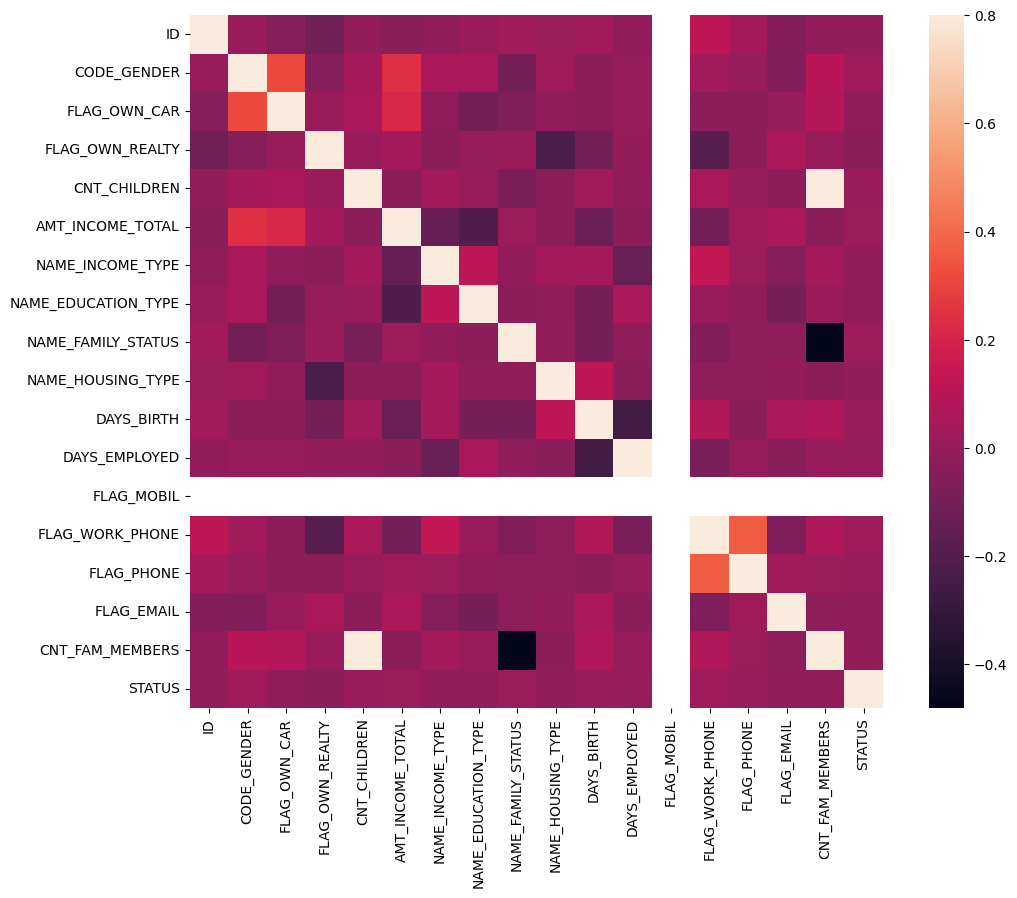

In [36]:
#correlation matrix
corrmat = df.corr()
fif, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [37]:
df.info() # checking for number of rows. 
# there are 11144 rows.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11144 entries, 24 to 434805
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   11144 non-null  int64  
 1   CODE_GENDER          11144 non-null  int32  
 2   FLAG_OWN_CAR         11144 non-null  int32  
 3   FLAG_OWN_REALTY      11144 non-null  int32  
 4   CNT_CHILDREN         11144 non-null  int64  
 5   AMT_INCOME_TOTAL     11144 non-null  float64
 6   NAME_INCOME_TYPE     11144 non-null  int32  
 7   NAME_EDUCATION_TYPE  11144 non-null  int32  
 8   NAME_FAMILY_STATUS   11144 non-null  int32  
 9   NAME_HOUSING_TYPE    11144 non-null  int32  
 10  DAYS_BIRTH           11144 non-null  int64  
 11  DAYS_EMPLOYED        11144 non-null  int64  
 12  FLAG_MOBIL           11144 non-null  int64  
 13  FLAG_WORK_PHONE      11144 non-null  int64  
 14  FLAG_PHONE           11144 non-null  int64  
 15  FLAG_EMAIL           11144 non-nul

In [38]:
X = df.iloc[:,1:-1] # X value contains all the variables except labels
y = df.iloc[:,-1] # these are the labels


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
# we create the test train split first

In [40]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)
# we have now fit and transform the data into a scaler for accurate reading and results.

In [41]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)
# we have addressed the issue of oversampling here

In [42]:
y_train.value_counts()

0    7673
1     127
Name: STATUS, dtype: int64

In [43]:
y_balanced.value_counts()

0    7673
1    7673
Name: STATUS, dtype: int64

In [44]:
y_test.value_counts()

0    3287
1      57
Name: STATUS, dtype: int64

In [45]:
y_test_balanced.value_counts()

0    3287
1    3287
Name: STATUS, dtype: int64

Draft on modelling, for latest one, please refer to GA2.ipymb


In [ ]:
#!pip uninstall scikit-learn -y
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

Logistic Regression (Imbalanced Test Data)

In [ ]:
model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Logistic Regression (Balanced Test Data)

In [ ]:
model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test_balanced)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))

Random Forest (Imbalanced Test Data)

In [ ]:
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
cm = confusion_matrix(y_test, y_predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()  

Random Forest (Balanced Test Data)

In [ ]:
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test_balanced)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))

cm = confusion_matrix(y_test_balanced, y_predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

XGBoost (Imbalanced Test Data)

In [ ]:
model = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
cm = confusion_matrix(y_test, y_predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

XGBoost (Balanced Test Data)

In [ ]:
model = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test_balanced)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))

cm = confusion_matrix(y_test_balanced, y_predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

BORDER LINE --------------------------------------------------------------------------------

In [ ]:
# Import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

# Import Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Import Support Vector Machines
from sklearn.svm import SVC

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV


In [ ]:
# Create dictionary for results
result = pd.DataFrame(columns=['Model', 'Score'])

K-Nearest Neighbors (KNN) (Imbalanced Test Data)

In [ ]:
# Instantiate, Fit and Predict using KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_balanced,y_balanced)
y_pred = model.predict(X_test)

# Get the accuracy score of KNeighborsClassifier model
accuracy = model.score(X_test,y_test)
result = result.append({'Model': 'KNN+U', 'Score': accuracy.round(5)}, ignore_index=True)
print("Accuracy of KNeighborsClassifier(Imbalanced Test Data): {:.5}".format(accuracy))

# Print and plot the confusion matrix of the KNeighborsClassifier model
cm_knn = confusion_matrix(y_test,y_pred)
print(cm_knn)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=model.classes_)
disp_knn.plot(cmap = 'Blues')
plt.show()


K-Nearest Neighbors (KNN) (Balanced Test Data)

In [ ]:
# Instantiate, Fit and Predict using KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_balanced,y_balanced)
y_pred = model.predict(X_test_balanced)

# Get the accuracy score of KNeighborsClassifier model
accuracy = model.score(X_test_balanced,y_test_balanced)
result = result.append({'Model': 'KNN+B', 'Score': accuracy.round(5)}, ignore_index=True)
print("Accuracy of KNeighborsClassifier(Balanced Test Data): {:.5}".format(accuracy))

# Print and plot the confusion matrix of the KNeighborsClassifier model
cm_knn = confusion_matrix(y_test_balanced,y_pred)
print(cm_knn)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=model.classes_)
disp_knn.plot(cmap = 'Blues')
plt.show()

Naive Bayes (Imbalanced Test Data)

In [ ]:
# Instantiate, Fit and Predict using Naive Bayes
model = GaussianNB()
model.fit(X_balanced, y_balanced)
y_pred = model.predict(X_test)

# Get the accuracy score of Naive Bayes model
accuracy = model.score(X_test,y_test)
result = result.append({'Model': 'NB+U', 'Score': accuracy.round(5)}, ignore_index=True)
print("Accuracy of Naive Bayes(Imbalanced Test Data): {:.5}".format(accuracy))

# Print and plot the confusion matrix of the Naive Bayes model
cm_NB = confusion_matrix(y_test,y_pred)
print(cm_NB)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_NB,display_labels=model.classes_)
disp_knn.plot(cmap = 'Blues')
plt.show()

Naive Bayes (Balanced Test Data)

In [ ]:
# Instantiate, Fit and Predict using Naive Bayes
model = GaussianNB()
model.fit(X_balanced, y_balanced)
y_pred = model.predict(X_test_balanced)

# Get the accuracy score of Naive Bayes model
accuracy = model.score(X_test_balanced,y_test_balanced)
result = result.append({'Model': 'NB+B', 'Score': accuracy.round(5)}, ignore_index=True)
print("Accuracy of Naive Bayes(Imbalanced Test Data): {:.5}".format(accuracy))

# Print and plot the confusion matrix of the Naive Bayes model
cm_NB = confusion_matrix(y_test_balanced,y_pred)
print(cm_NB)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_NB,display_labels=model.classes_)
disp_knn.plot(cmap = 'Blues')
plt.show()

Support Vector Machines (SVM) (Imbalanced Test Data)

In [ ]:
# Instantiate, Fit and Predict using SVM
model = SVC(kernel='linear')
model.fit(X_balanced, y_balanced)
y_pred = model.predict(X_test)

# Get the accuracy score of SVM model
accuracy = model.score(X_test,y_test)
result = result.append({'Model': 'SVM+U', 'Score': accuracy.round(5)}, ignore_index=True)
print("Accuracy of SVM (Imbalanced Test Data): {:.5}".format(accuracy))

# Print and plot the confusion matrix of the SVM model
cm_NB = confusion_matrix(y_test,y_pred)
print(cm_NB)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_NB,display_labels=model.classes_)
disp_knn.plot(cmap = 'Blues')
plt.show()

Support Vector Machines (SVM) (Balanced Test Data)

In [ ]:
# Instantiate, Fit and Predict using SVM
model = SVC(kernel='linear')
model.fit(X_balanced, y_balanced)
y_pred = model.predict(X_test_balanced)

# Get the accuracy score of SVM model
accuracy = model.score(X_test_balanced,y_test_balanced)
result = result.append({'Model': 'SVM+B', 'Score': accuracy.round(5)}, ignore_index=True)
print("Accuracy of SVM (Imbalanced Test Data): {:.5}".format(accuracy))

# Print and plot the confusion matrix of the SVM model
cm_NB = confusion_matrix(y_test_balanced,y_pred)
print(cm_NB)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_NB,display_labels=model.classes_)
disp_knn.plot(cmap = 'Blues')
plt.show()

Finetuning the best machine learning model

In [ ]:
print(result)
max_score = np.max(result['Score'])
max_index = result['Score'].idxmax()
best_model = result.iloc[max_index]['Model']
print('The best model for credit card approval dataset will be {} with accuracy of {:.5}.'
      .format(best_model, max_score))

In [ ]:
# Instantiate Grid Parameters for KNN with Imbalanced Data
param_grid = {'n_neighbors': np.arange(2,20),
              'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()

# Instantiate Grid Search with Parameter Grids
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)

grid_search.fit(X_balanced, y_balanced)
print(grid_search.score(X_test,y_test))
print(grid_search.best_params_)